In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import shap
import seaborn as sns
import numpy as np

In [2]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [3]:
df= pd.read_excel("C:/Users/Viswanathan/Desktop/Gestational Diabetic Data Set.xlsx")


In [4]:
df.dtypes

Age                                  int64
No of Pregnancy                      int64
Gestation in previous Pregnancy      int64
BMI                                float64
HDL                                float64
Family History                       int64
unexplained prenetal loss            int64
Large Child or Birth Default         int64
PCOS                                 int64
Sys BP                             float64
Dia BP                               int64
OGTT                               float64
Hemoglobin                         float64
Sedentary Lifestyle                  int64
Prediabetes                          int64
Outcome                              int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              3524 non-null   int64  
 1   No of Pregnancy                  3524 non-null   int64  
 2   Gestation in previous Pregnancy  3524 non-null   int64  
 3   BMI                              2444 non-null   float64
 4   HDL                              2523 non-null   float64
 5   Family History                   3524 non-null   int64  
 6   unexplained prenetal loss        3524 non-null   int64  
 7   Large Child or Birth Default     3524 non-null   int64  
 8   PCOS                             3524 non-null   int64  
 9   Sys BP                           1819 non-null   float64
 10  Dia BP                           3524 non-null   int64  
 11  OGTT                             3012 non-null   float64
 12  Hemoglobin          

In [6]:
import pandas

pandas.set_option('display.width', 150)
description = df.describe()
print(description)


               Age  No of Pregnancy  Gestation in previous Pregnancy          BMI          HDL  Family History  unexplained prenetal loss  \
count  3524.000000      3524.000000                      3524.000000  2444.000000  2523.000000     3524.000000                3524.000000   
mean     32.582860         2.076334                         0.960840    27.854092    46.468490        0.498297                   0.364926   
std       6.169265         0.838755                         0.722415     5.714737    10.801618        0.500068                   0.481478   
min      20.000000         1.000000                         0.000000    13.300000    15.000000        0.000000                   0.000000   
25%      28.000000         1.000000                         0.000000    24.400000    42.000000        0.000000                   0.000000   
50%      32.000000         2.000000                         1.000000    27.500000    49.000000        0.000000                   0.000000   
75%      37.0

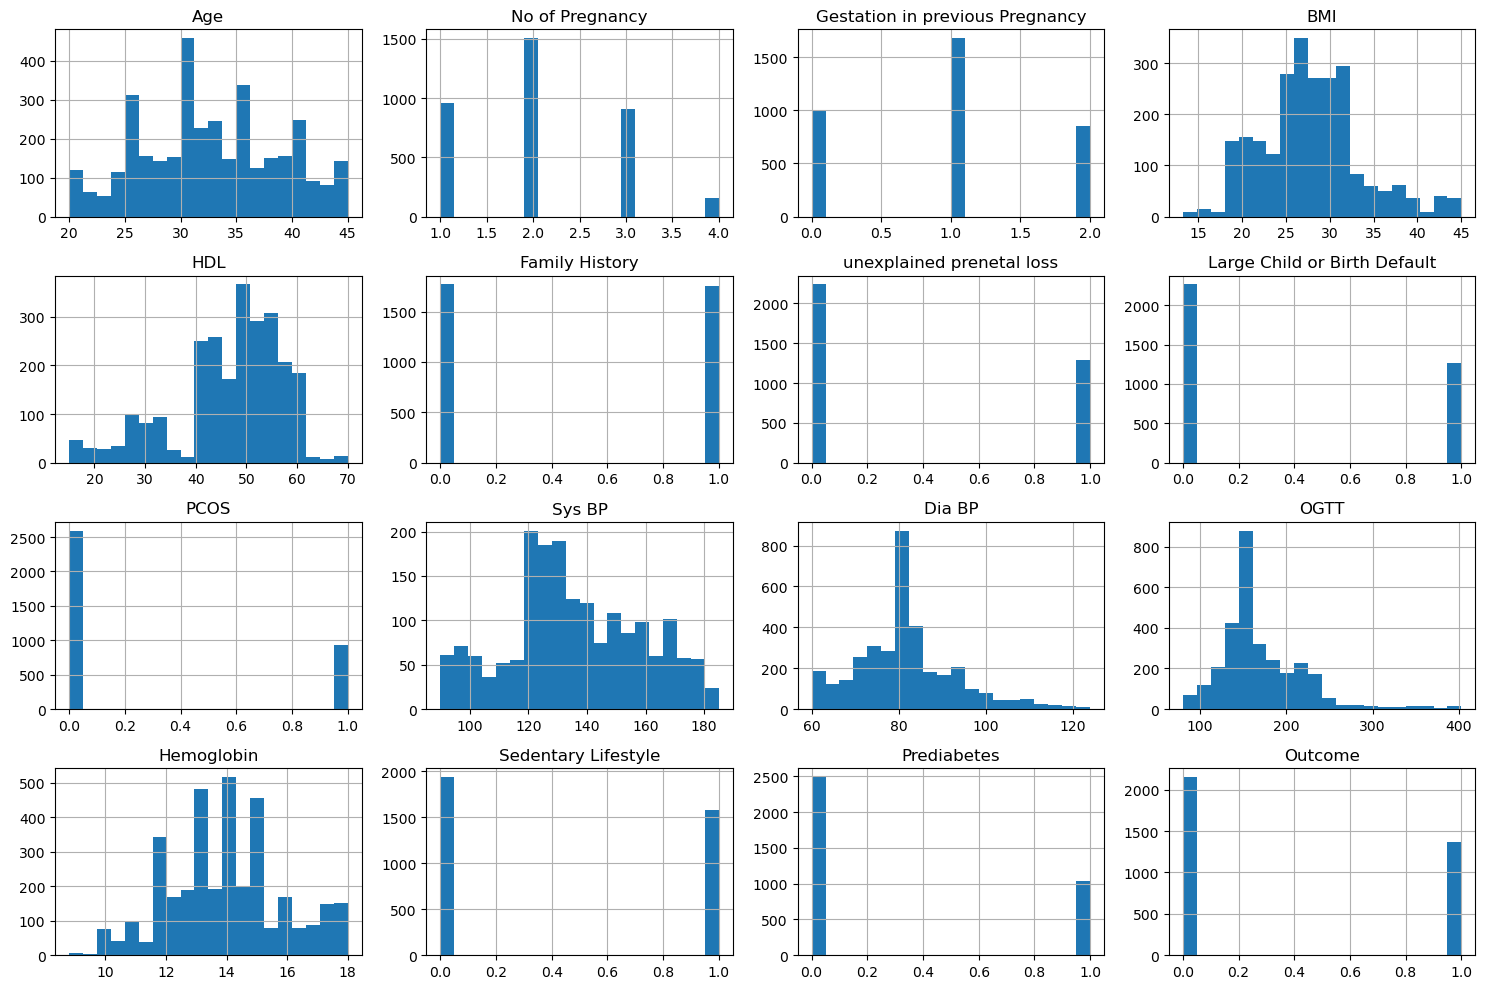

In [7]:
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

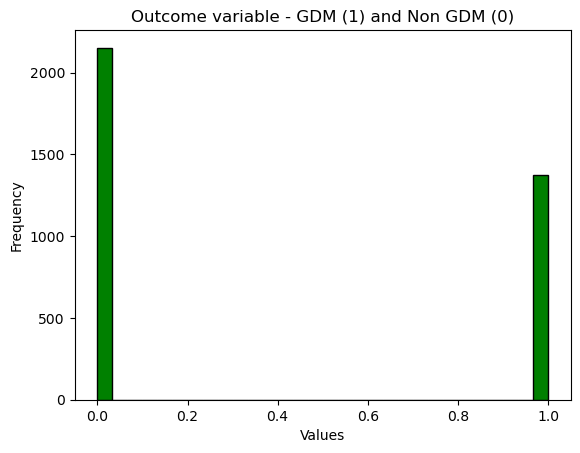

In [80]:
 

plt.hist(df["Outcome"], bins=30, color='green', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Outcome variable - GDM (1) and Non GDM (0)')
 
# Display the plot
plt.show()

In [9]:
skew = df.skew()
print(skew)

Age                                0.050452
No of Pregnancy                    0.317600
Gestation in previous Pregnancy    0.058916
BMI                                0.524710
HDL                               -0.917368
Family History                     0.006813
unexplained prenetal loss          0.561399
Large Child or Birth Default       0.593407
PCOS                               1.066829
Sys BP                             0.087402
Dia BP                             0.695347
OGTT                               1.495513
Hemoglobin                         0.187583
Sedentary Lifestyle                0.202015
Prediabetes                        0.909296
Outcome                            0.454131
dtype: float64


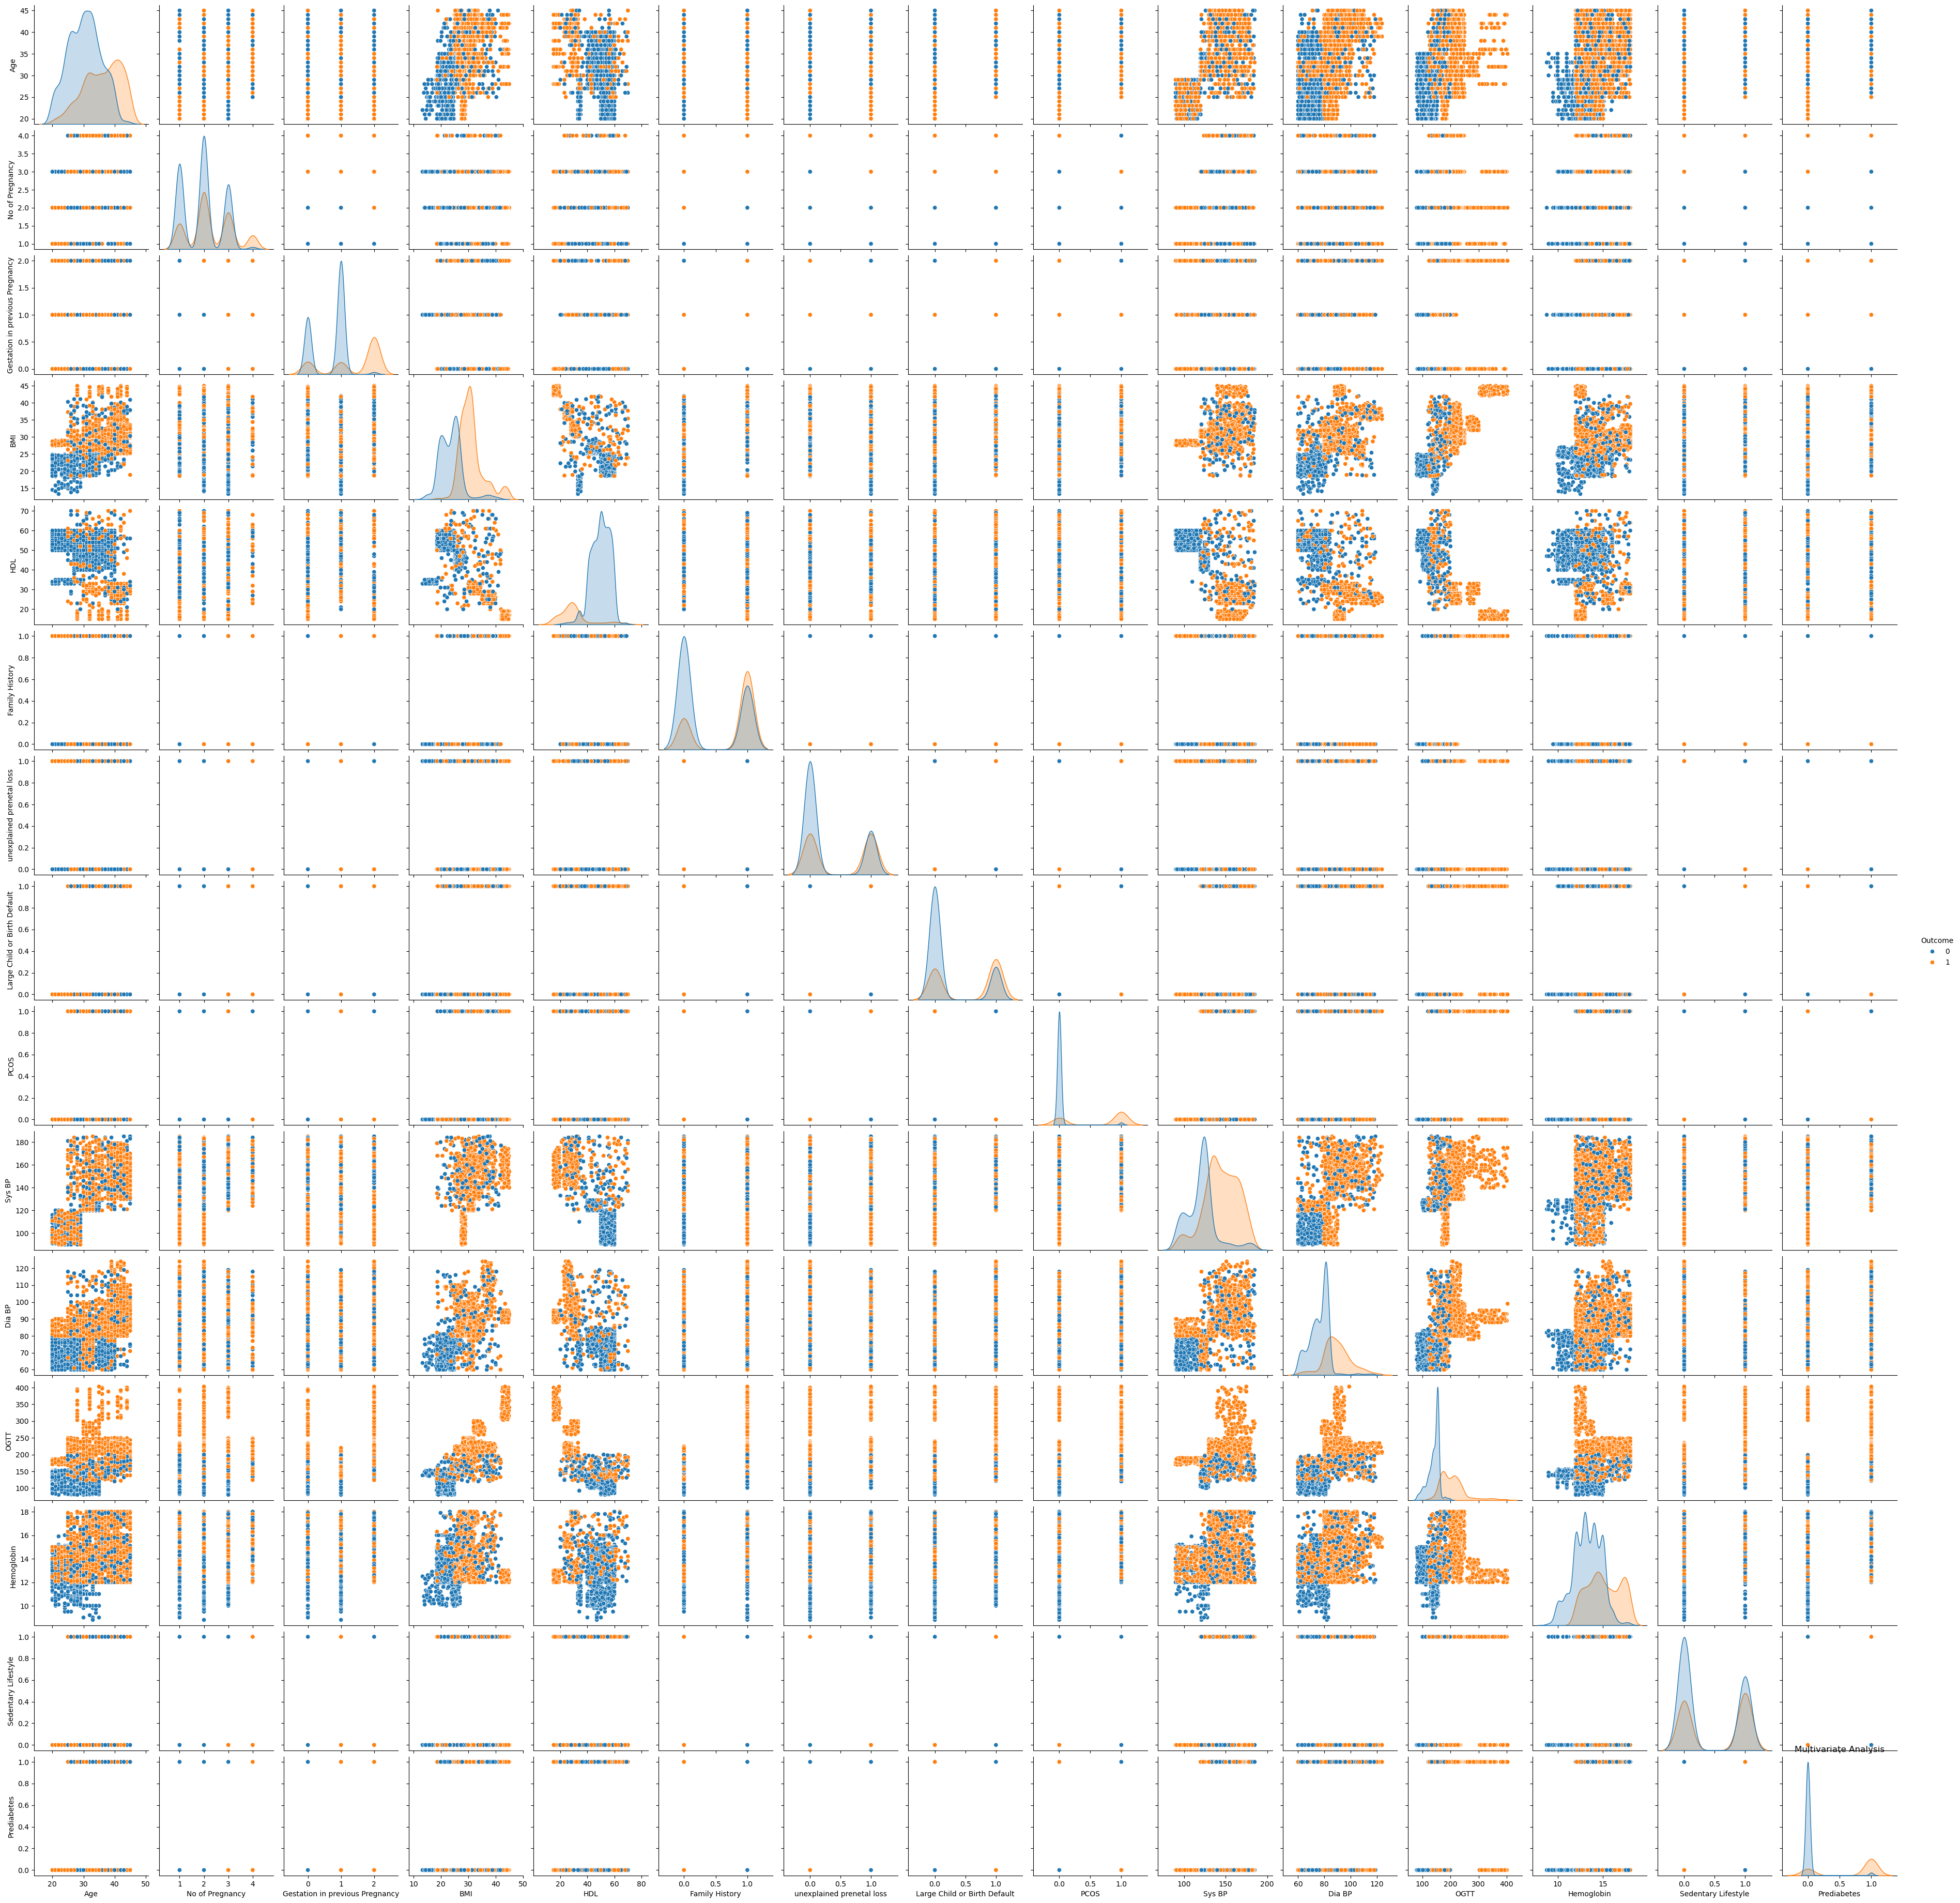

In [10]:
sns.pairplot(df, hue='Outcome')
plt.title('Multivariate Analysis')
plt.show()

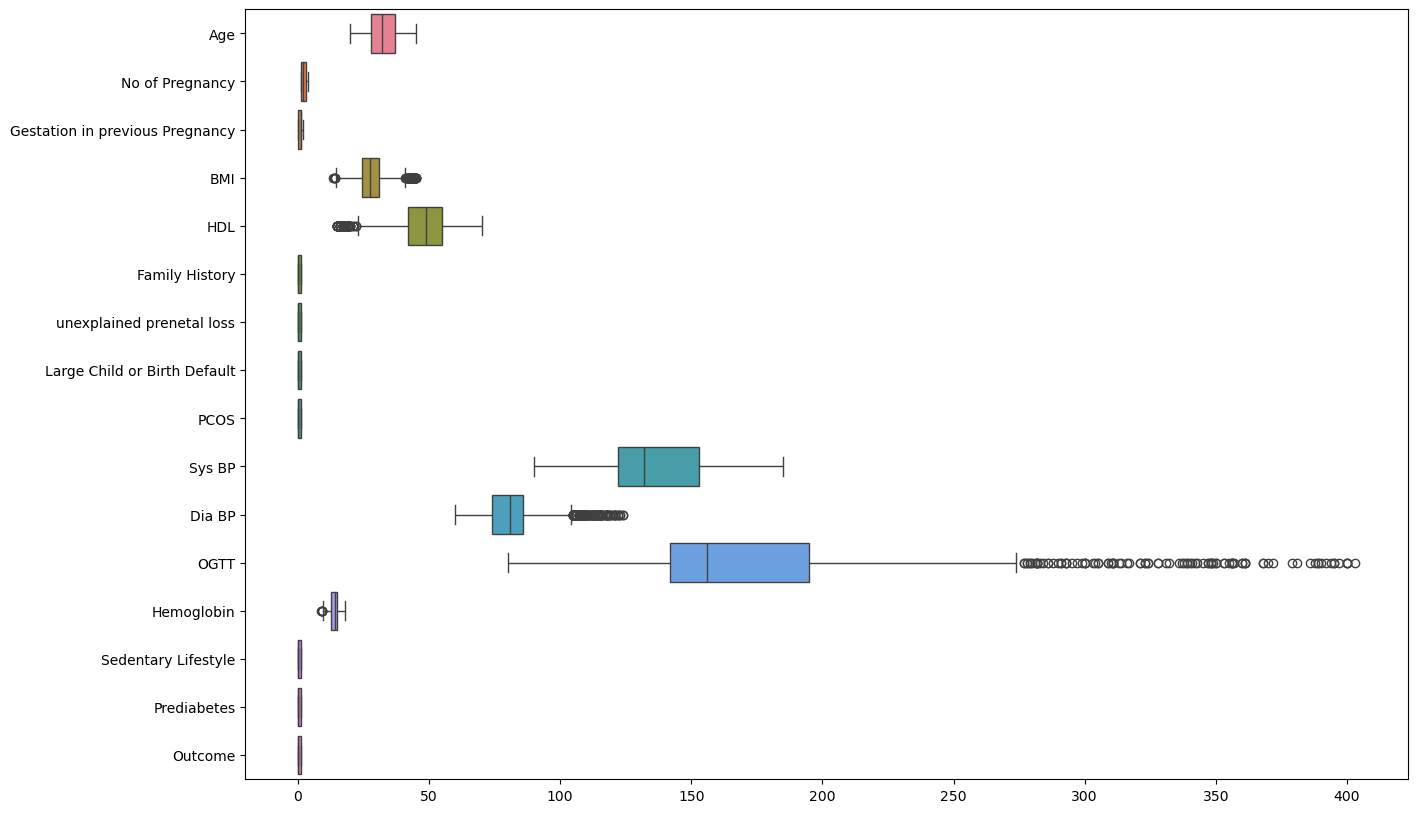

In [11]:
# To find the outlier in the numerical data
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')
plt.show()

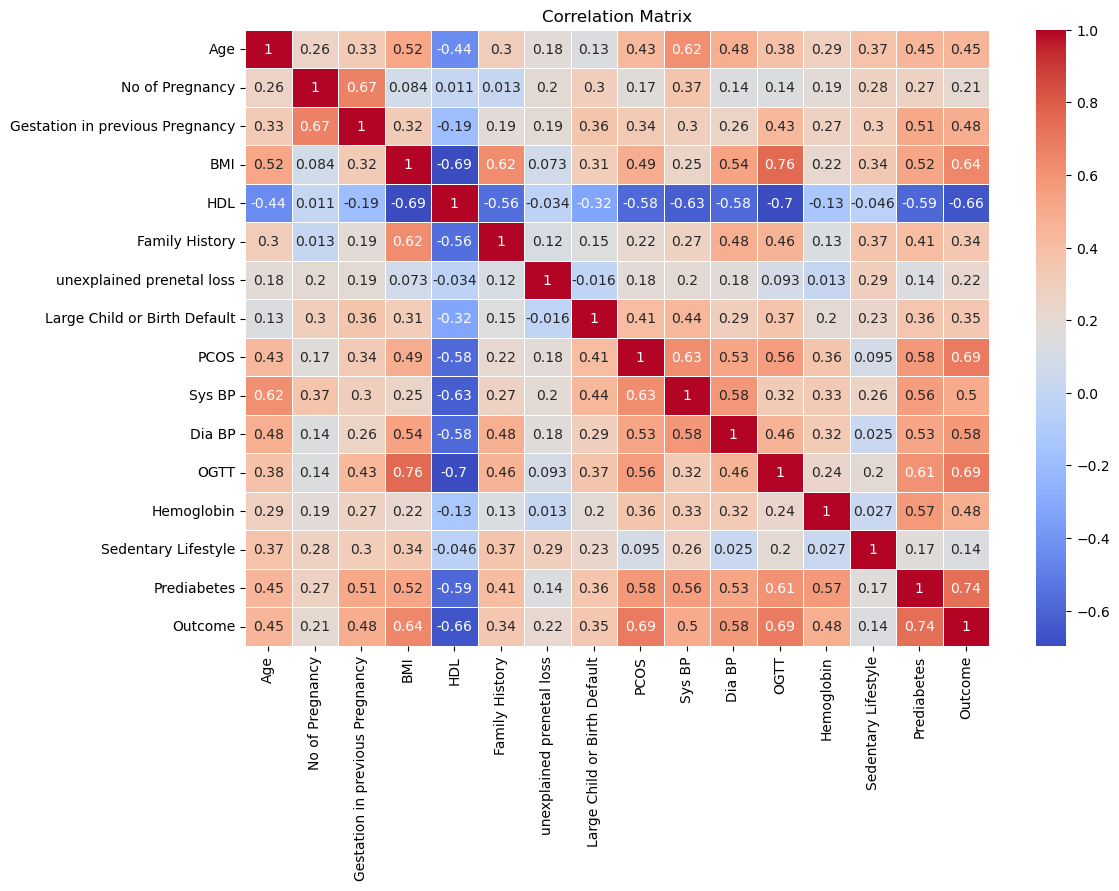

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
df=df.drop(['HDL', 'unexplained prenetal loss','Sys BP','Dia BP','OGTT', 'Hemoglobin','Sedentary Lifestyle','Prediabetes'],axis=1)
print(df)

      Age  No of Pregnancy  Gestation in previous Pregnancy   BMI  Family History  Large Child or Birth Default  PCOS  Outcome
0      22                2                                1   NaN               0                             0     0        0
1      26                2                                1   NaN               0                             0     0        0
2      29                1                                0   NaN               0                             0     0        0
3      28                2                                1   NaN               0                             0     0        0
4      21                2                                1   NaN               0                             0     0        0
...   ...              ...                              ...   ...             ...                           ...   ...      ...
3519   31                4                                1  24.1               0                             1

In [11]:
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              3524 non-null   int64  
 1   No of Pregnancy                  3524 non-null   int64  
 2   Gestation in previous Pregnancy  3524 non-null   int64  
 3   BMI                              2444 non-null   float64
 4   Family History                   3524 non-null   int64  
 5   Large Child or Birth Default     3524 non-null   int64  
 6   PCOS                             3524 non-null   int64  
 7   Outcome                          3524 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 220.4 KB


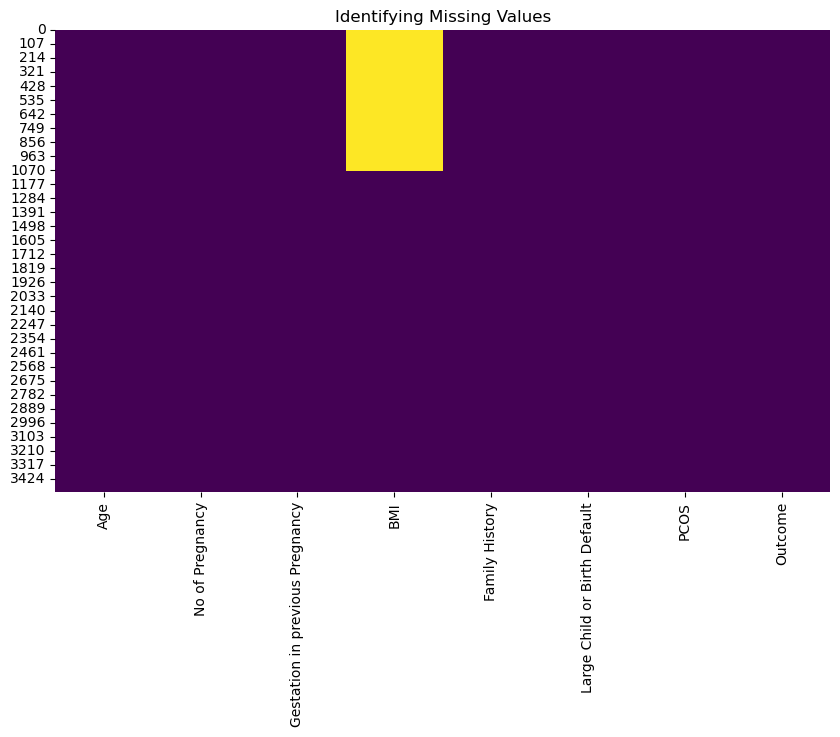

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Identifying Missing Values')
plt.show()

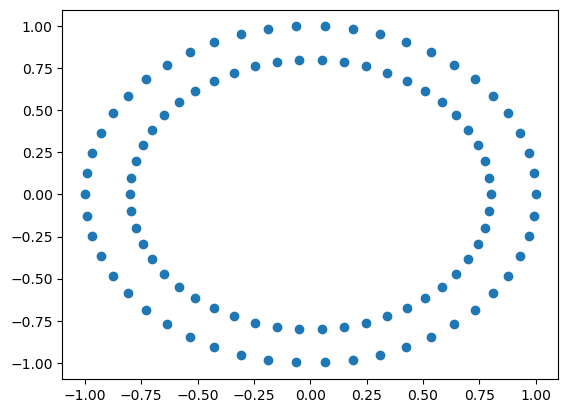

In [13]:
X, y = make_circles(n_samples=100, noise=0.0, random_state=1)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [16]:
X=df[["Age", "No of Pregnancy", "Gestation in previous Pregnancy","Family History", "Large Child or Birth Default", "PCOS"]]
y=df["Outcome"]
from sklearn.feature_selection import RFE

from sklearn.svm import SVR
estimator = SVR(kernel="linear")

selector = RFE(estimator, n_features_to_select=5, step=1)

selector.fit(X, y)

print(selector.support_)

print(selector.ranking_)


[ True  True  True  True False  True]
[1 1 1 1 2 1]


In [12]:

X=df[["Age", "No of Pregnancy", "Gestation in previous Pregnancy","BMI","Family History", "Large Child or Birth Default", "PCOS"]]
y=df["Outcome"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1762, 7)
X_test shape: (1762, 7)
y_train shape: (1762,)
y_test shape: (1762,)


In [14]:

X_train.isnull().sum()







Age                                  0
No of Pregnancy                      0
Gestation in previous Pregnancy      0
BMI                                546
Family History                       0
Large Child or Birth Default         0
PCOS                                 0
dtype: int64

In [15]:
X_test.isnull().sum()

Age                                  0
No of Pregnancy                      0
Gestation in previous Pregnancy      0
BMI                                534
Family History                       0
Large Child or Birth Default         0
PCOS                                 0
dtype: int64

In [16]:
y_train.isnull().sum()

0

In [17]:
y_test.isnull().sum()

0

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X_train[["BMI"]],X_test[["BMI"]])
X_train["BMI"] = imputer.transform(X_train[["BMI"]])
X_test["BMI"] = imputer.transform(X_test[["BMI"]])


In [19]:
X_train.isnull().sum()

Age                                0
No of Pregnancy                    0
Gestation in previous Pregnancy    0
BMI                                0
Family History                     0
Large Child or Birth Default       0
PCOS                               0
dtype: int64

In [20]:
X_test.isnull().sum()

Age                                0
No of Pregnancy                    0
Gestation in previous Pregnancy    0
BMI                                0
Family History                     0
Large Child or Birth Default       0
PCOS                               0
dtype: int64

In [27]:
model = AdaBoostClassifier()
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best: 0.962724 using {'learning_rate': 1.0, 'n_estimators': 50}
0.898993 (0.016641) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.898993 (0.016641) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.898993 (0.016641) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.898993 (0.016641) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.898993 (0.016641) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.898993 (0.016641) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.898993 (0.016641) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.898993 (0.016641) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.898993 (0.016641) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.898993 (0.016641) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.912047 (0.020003) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.937962 (0.021217) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.912047 (0.020003) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.940041 

In [28]:
rfc = RandomForestClassifier()
forest_params = {
    'bootstrap': [True,False],
    'max_depth': [2,4],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1,2],
    'min_samples_split': [2],
    'n_estimators': [100]
}

Randomforest = GridSearchCV(rfc, param_grid= forest_params, cv = 10, n_jobs=-1,verbose=2)

Randomforest.fit(X_train, y_train)
print(Randomforest.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Viswanath

{'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [29]:
LR = LogisticRegression()
LR_params=  {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100]}
Logisticregressionclassifier = GridSearchCV(estimator=LR, param_grid = LR_params, cv = 10, verbose=True, n_jobs=-1)
Logisticregressionclassifier.fit(X_train,y_train)
print(Logisticregressionclassifier.best_params_)


Fitting 10 folds for each of 400 candidates, totalling 4000 fits
{'C': 11.288378916846883, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2600 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py", lin

In [30]:
NB=GaussianNB()
NB_params = {'var_smoothing': np.logspace(0,-9, num=100)}
Naivebayes=GridSearchCV(estimator=NB, 
                     param_grid=NB_params, 
                     cv=10,
                     verbose=1, 
                     scoring='accuracy')
Naivebayes.fit(X_train,y_train)
print(Naivebayes.best_params_)
print(Naivebayes.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'var_smoothing': 0.0004328761281083057}
GaussianNB(var_smoothing=0.0004328761281083057)


In [ ]:
svc=SVC()
svc_params = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear','rbf','poly','sigmoid']}  
  
Supportvectorclassifier = GridSearchCV(estimator=svc, param_grid=svc_params, refit = True, verbose = 3) 
Supportvectorclassifier.fit(X_train,y_train)
print(Supportvectorclassifier.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.926 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.926 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.926 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.946 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.836 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.958 total time= 2.2min
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier()
Dtree_params= {
    'max_depth': [10, 20, 30,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] }
Decisiontree = GridSearchCV(Dtree, param_grid= Dtree_params, cv = 10, scoring='accuracy')
Decisiontree.fit(X_train, y_train)
print(Decisiontree.best_params_)

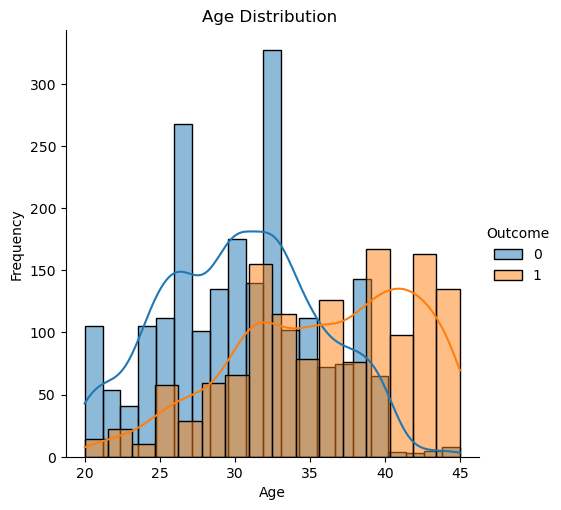

In [21]:
sns.FacetGrid(df, hue="Outcome", height=5).map(sns.histplot, "Age", kde=True).add_legend()
plt.title('Age Distribution ')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.hist(df["Target"])
plt.xlabel('Target')
plt.title('Target distribution of GDM-1 vs NonGDM-0')
 
plt.show()

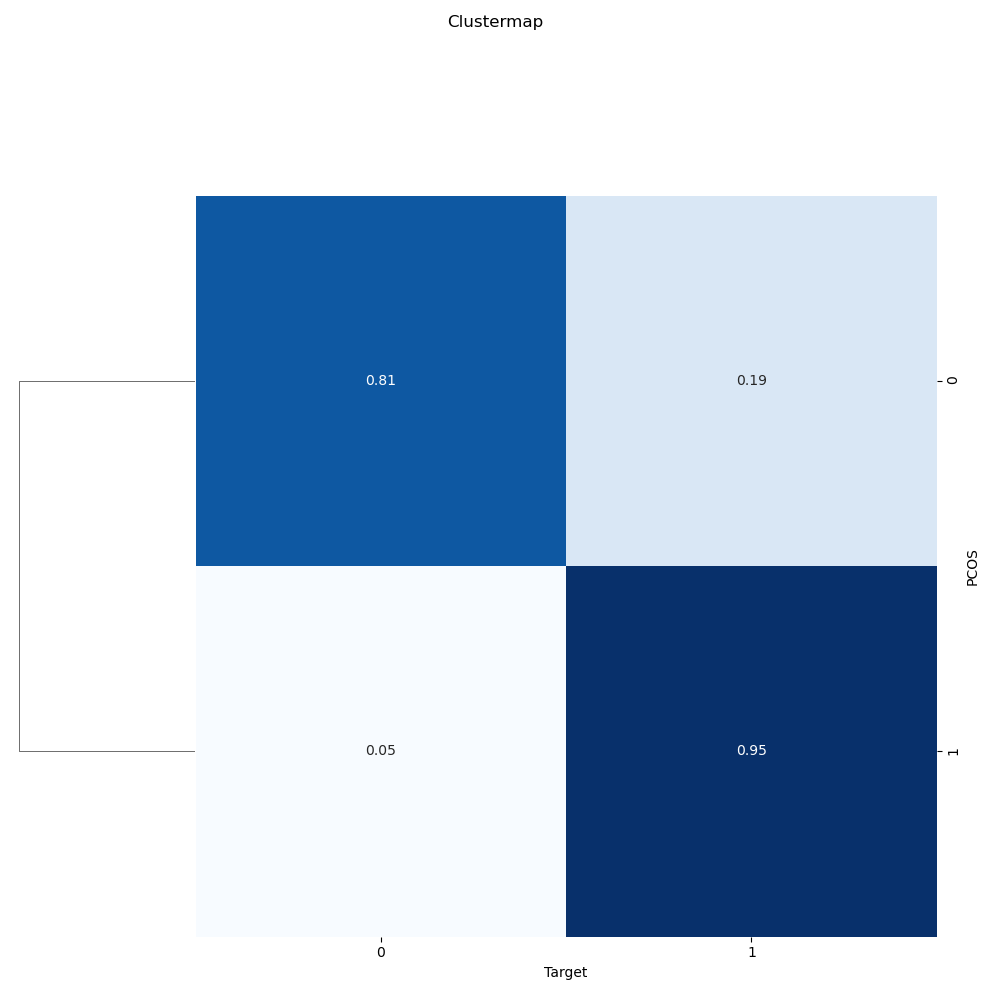

In [46]:
df_crosstab = pd.crosstab(df.PCOS, df.Target, normalize='index')
# Create clustermap
g = sns.clustermap(df_crosstab, annot=True, cmap='Blues', fmt=".2f", col_cluster=False, cbar=False, cbar_pos=None)
# Add title
g.fig.suptitle('Clustermap')
# Plot figure
plt.show()

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap = True, max_depth = 4, max_features = "sqrt", min_samples_leaf = 2, min_samples_split = 2, n_estimators= 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2)

In [28]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics
print("Training Accuracy =", format(metrics.accuracy_score(y_train, rfc_train)))

Training Accuracy = 0.9585698070374574


In [29]:
rfc_predictions = rfc.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, rfc_predictions)))

Test Accuracy = 0.9523269012485811


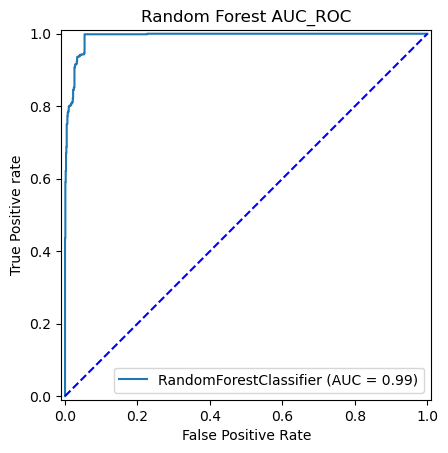

In [74]:
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("Random Forest AUC_ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

Text(0.5, 1.0, 'Random Forest Feature Importance')

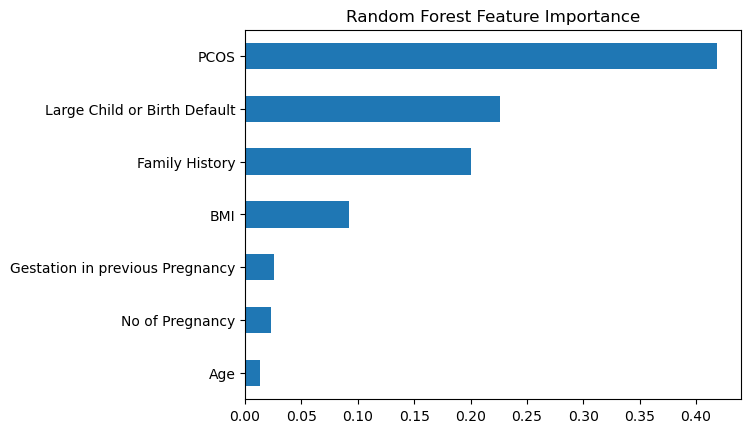

In [30]:
rfc.feature_importances_
sorted_idx = rfc.feature_importances_.argsort()
pd.Series(rfc.feature_importances_[sorted_idx],index=X.columns).plot(kind='barh')
plt.title("Random Forest Feature Importance")

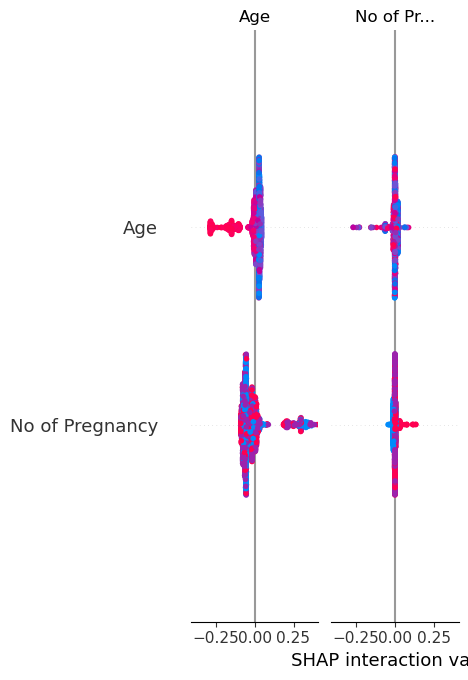

Feature: 0, Score: 0.10743
Feature: 1, Score: 0.01339
Feature: 2, Score: 0.21647
Feature: 3, Score: 0.37339
Feature: 4, Score: 0.02617
Feature: 5, Score: 0.03171
Feature: 6, Score: 0.23144


Text(0.5, 1.0, 'Random Forest SHAP model')

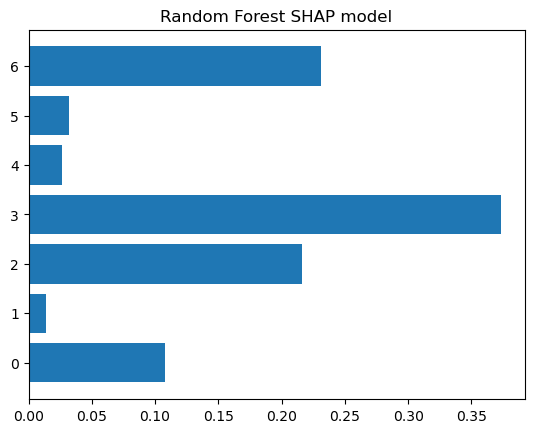

In [119]:
import shap
from matplotlib import pyplot as plt
shap.initjs()
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.title("Random Forest SHAP model")

([0.03409090909090909,
  0.03409090909090909,
  0.04734848484848485,
  0.045454545454545456,
  0.04426787741203178,
  0.04446546830652791,
  0.047039740470397405,
  0.0454222853087296,
  0.0416403785488959,
  0.04029511918274688],
 [0.07434733257661748,
  0.05051078320090806,
  0.05278093076049943,
  0.051645856980703744,
  0.051645856980703744,
  0.04937570942111237,
  0.04880817253121453,
  0.04767309875141884,
  0.04937570942111237,
  0.048240635641316684])

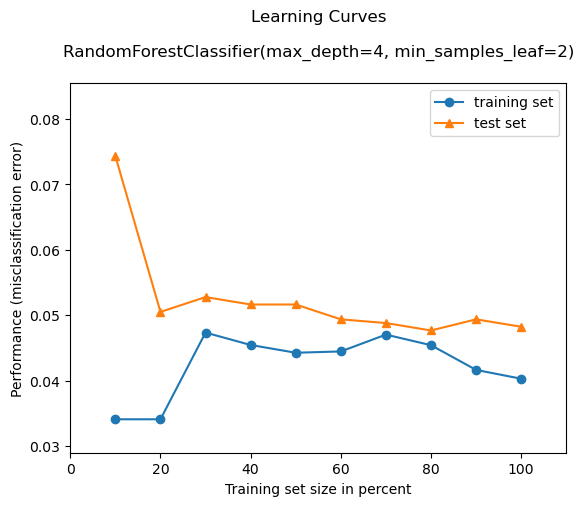

In [116]:
plot_learning_curves(X_train, y_train, X_test, y_test, rfc)

In [27]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rfc, X_test, y_test, cv=10, scoring='accuracy')

# Print results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.93785311 0.96610169 0.94886364 0.97159091 0.96590909 0.91477273
 0.95454545 0.94886364 0.97159091 0.94886364]
Mean accuracy: 0.9528954802259888
Standard deviation: 0.016655039102326165


In [87]:

pip install probatus


Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
svc_model = SVC(C=0.1, gamma=1, kernel="linear")
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, svc_pred)))

Test Accuracy = 0.9262202043132803


([0.11931818181818182,
  0.11363636363636363,
  0.10416666666666667,
  0.09232954545454546,
  0.07832009080590238,
  0.07663197729422895,
  0.07218167072181671,
  0.07026259758694109,
  0.06687697160883281,
  0.06696935300794551],
 [0.12996594778660614,
  0.10102156640181612,
  0.09648127128263337,
  0.0891032917139614,
  0.07604994324631101,
  0.07491486946651532,
  0.07377979568671963,
  0.07377979568671963,
  0.07377979568671963,
  0.07377979568671963])

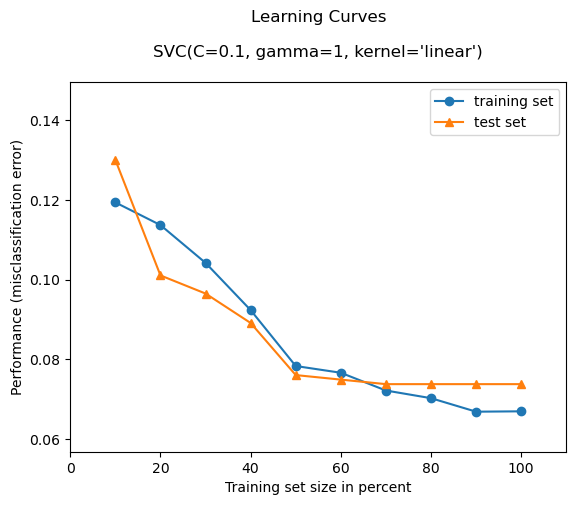

In [32]:

from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, svc_model)

In [100]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svc_model, X_test, y_test, cv=10, scoring='accuracy')

# Print results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.88135593 0.8700565  0.88700565 0.86931818 0.875      0.88068182
 0.90340909 0.875      0.86931818 0.90340909]
Mean accuracy: 0.881455444273241
Standard deviation: 0.01226069401771223


In [33]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth= 20, min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test,dtree_predictions)))

Test Accuracy = 0.9687854710556186


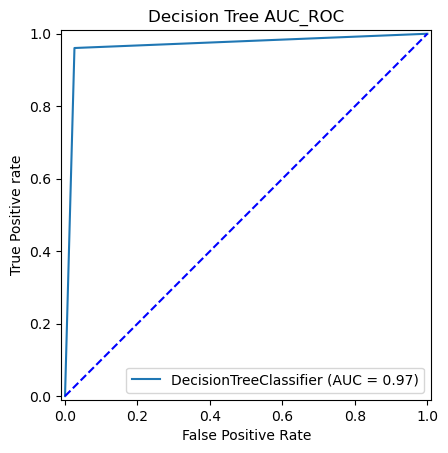

In [72]:
from sklearn.metrics import RocCurveDisplay
dtree_disp = RocCurveDisplay.from_estimator(dtree, X_test, y_test)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("Decision Tree AUC_ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.05788876276958002,
  0.04029511918274688,
  0.02894438138479001,
  0.031214528944381384,
  0.036322360953461974,
  0.030079455164585697,
  0.03064699205448354,
  0.03348467650397276,
  0.03348467650397276,
  0.03234960272417707])

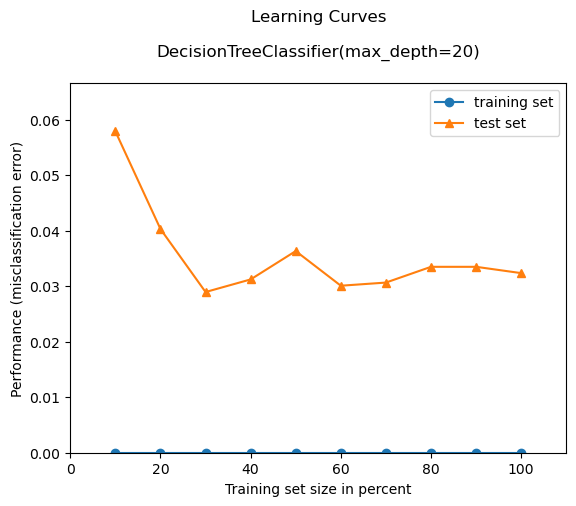

In [106]:
plot_learning_curves(X_train, y_train, X_test, y_test, dtree)

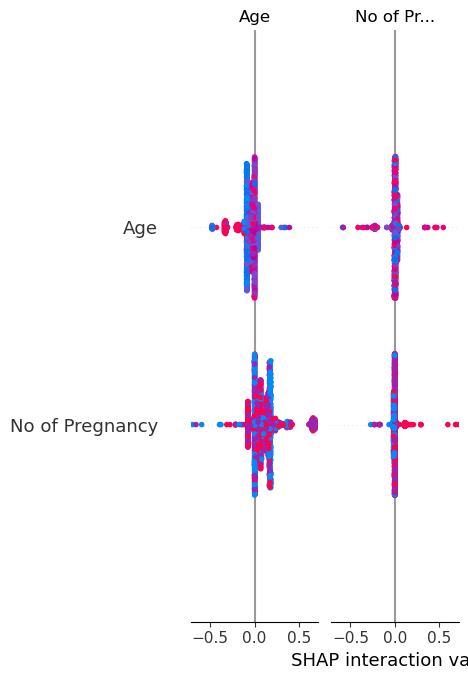

Feature: 0, Score: 0.08642
Feature: 1, Score: 0.01990
Feature: 2, Score: 0.06003
Feature: 3, Score: 0.65631
Feature: 4, Score: 0.02074
Feature: 5, Score: 0.01880
Feature: 6, Score: 0.13779


Text(0.5, 1.0, 'Decision Tree SHAP model')

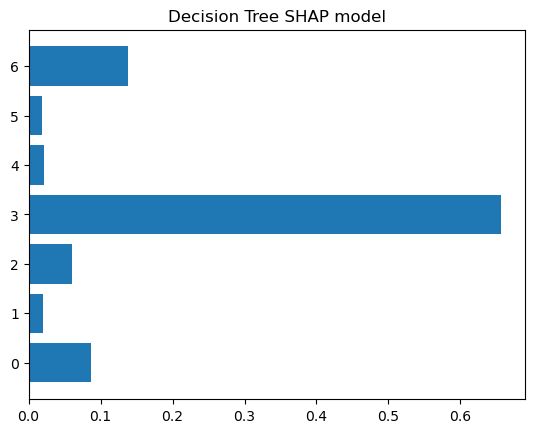

In [120]:
import shap
from matplotlib import pyplot as plt
shap.initjs()
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
importance = dtree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.title("Decision Tree SHAP model")

In [36]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dtree, X_test, y_test, cv=10, scoring='accuracy')

# Print results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.97740113 0.98305085 0.97175141 0.96022727 0.96590909 0.95454545
 0.94886364 0.96022727 0.97159091 0.95454545]
Mean accuracy: 0.9648112480739599
Standard deviation: 0.010457762990250148


In [52]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(dtree)
expected_value = explainer.expected_value
shap_interaction_values = treeExplainer.shap_interaction_values(x1)
shap.summary_plot(shap_interaction_values, features=x1, max_display=4)




Explainer expected value: [0.61066969 0.38933031]


ValueError: All dimensions of input must be of equal length

In [34]:
rfc_predictions = rfc.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, rfc_predictions)))

Test Accuracy = 0.9523269012485811


In [35]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=545.5594781168514, max_iter =100, penalty= 'l1', solver= 'liblinear')

LR.fit(X_train, y_train)
LR_predictions = LR.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test,LR_predictions)))

Test Accuracy = 0.9233825198637912


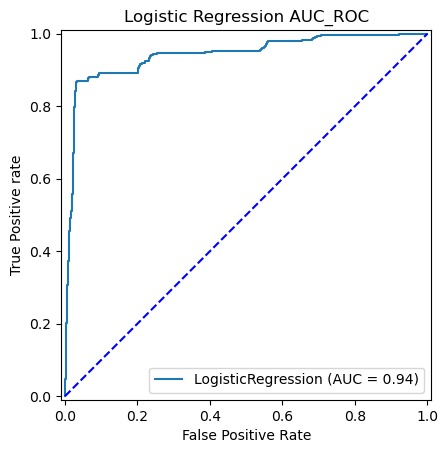

In [75]:
from sklearn.metrics import RocCurveDisplay
LR_disp = RocCurveDisplay.from_estimator(LR, X_test, y_test)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("Logistic Regression AUC_ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

([0.03977272727272727,
  0.08238636363636363,
  0.08522727272727272,
  0.07954545454545454,
  0.08059023836549375,
  0.08325449385052035,
  0.07380373073803731,
  0.07381121362668559,
  0.07318611987381704,
  0.07150964812712826],
 [0.07434733257661748,
  0.08626560726447219,
  0.08569807037457434,
  0.08342792281498297,
  0.08229284903518728,
  0.08399545970488081,
  0.07491486946651532,
  0.07491486946651532,
  0.0771850170261067,
  0.07661748013620885])

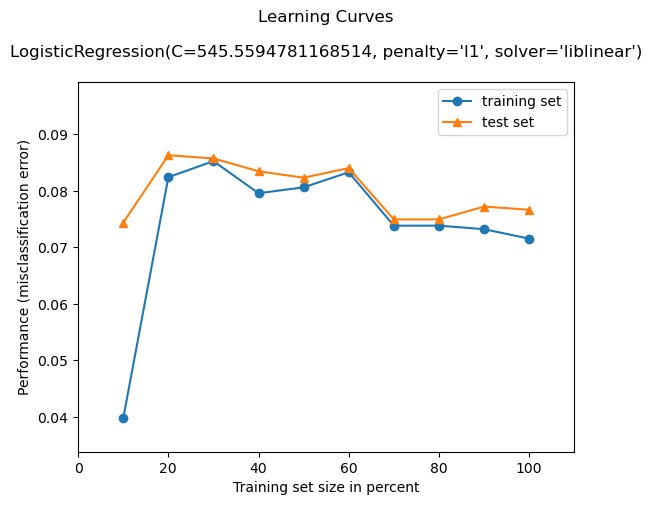

In [109]:
plot_learning_curves(X_train, y_train, X_test, y_test, LR)

In [58]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(LR)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
importance = LR.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [39]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(LR, X_test, y_test, cv=10, scoring='accuracy')

# Print results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.90960452 0.89830508 0.92655367 0.90909091 0.92045455 0.93181818
 0.91477273 0.90909091 0.91477273 0.92613636]
Mean accuracy: 0.9160599640472521
Standard deviation: 0.009678034024275178


In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
Naivebayes = GaussianNB(var_smoothing=0.0001873817422860383)
Naivebayes.fit(X_train, y_train)
Naivebayes_pred =Naivebayes.predict(X_test)
print ("Test Accuracy:", metrics.accuracy_score (y_test, Naivebayes_pred))

Test Accuracy: 0.9177071509648127


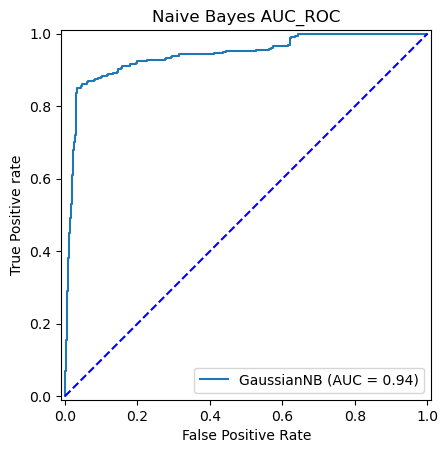

In [76]:
from sklearn.metrics import RocCurveDisplay
Naivebayes_disp = RocCurveDisplay.from_estimator(Naivebayes, X_test, y_test)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("Naive Bayes AUC_ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

([0.07386363636363637,
  0.10227272727272728,
  0.09090909090909091,
  0.08806818181818182,
  0.09080590238365494,
  0.09271523178807947,
  0.08759124087591241,
  0.085166784953868,
  0.08012618296529968,
  0.08059023836549375],
 [0.09194097616345062,
  0.09023836549375709,
  0.08172531214528944,
  0.08399545970488081,
  0.0851305334846765,
  0.08626560726447219,
  0.08172531214528944,
  0.08172531214528944,
  0.08229284903518728,
  0.08229284903518728])

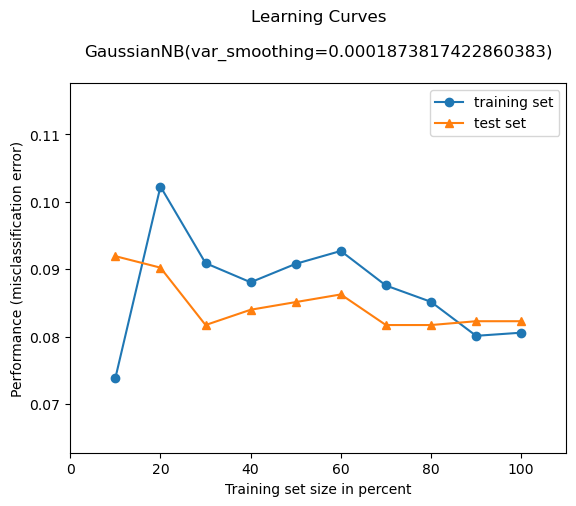

In [112]:
plot_learning_curves(X_train, y_train, X_test, y_test, Naivebayes)

In [42]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(Naivebayes, X_test, y_test, cv=10, scoring='accuracy')

# Print results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.92090395 0.88700565 0.92090395 0.89772727 0.92613636 0.91477273
 0.92045455 0.89772727 0.92045455 0.92045455]
Mean accuracy: 0.9126540832049306
Standard deviation: 0.012682209655323906


In [37]:
from sklearn.ensemble import AdaBoostClassifier
AdaB = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1.0)
AdaB.fit(X_train, y_train)
AdaB_predictions = AdaB.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test,AdaB_predictions)))

C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Accuracy = 0.9466515323496028


C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  war

([0.0,
  0.008522727272727272,
  0.017045454545454544,
  0.03551136363636364,
  0.02724177071509648,
  0.027436140018921477,
  0.030008110300081103,
  0.0319375443577005,
  0.029022082018927444,
  0.028376844494892167],
 [0.05959137343927355,
  0.060158910329171394,
  0.058456299659477864,
  0.06129398410896708,
  0.053348467650397274,
  0.055051078320090804,
  0.04767309875141884,
  0.05448354143019296,
  0.05448354143019296,
  0.053348467650397274])

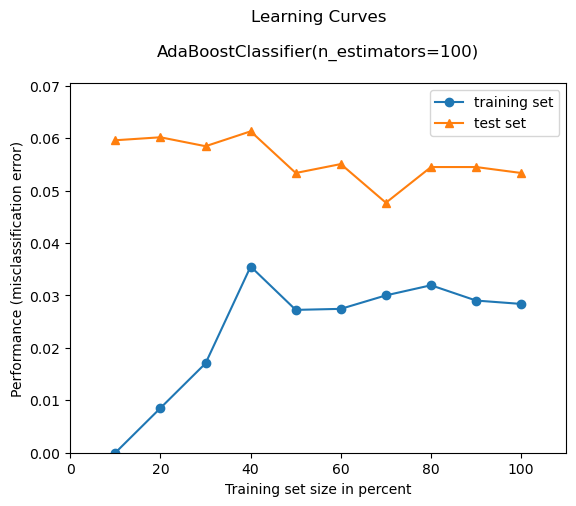

In [114]:
plot_learning_curves(X_train, y_train, X_test, y_test,AdaB)

In [44]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(AdaB, X_test, y_test, cv=10, scoring='accuracy')

# Print results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  war

Cross-validation scores: [0.93220339 0.96610169 0.96045198 0.9375     0.96590909 0.92613636
 0.94886364 0.93181818 0.9375     0.94886364]
Mean accuracy: 0.9455347971237803
Standard deviation: 0.013978844187123876


C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [120]:
import shap
shap.initjs()
explainer = shap(AdaB)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

TypeError: 'module' object is not callable

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import shap
import sklearn

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("SHAP version:", shap.__version__)
print("Sklearn version:", sklearn.__version__)

Pandas version: 2.2.2
NumPy version: 1.26.4
Seaborn version: 0.13.2
Matplotlib version: 3.8.4
SHAP version: 0.46.0
Sklearn version: 1.4.2


In [57]:
dtree.feature_importances_

array([0.08642484, 0.01989924, 0.06002654, 0.6563129 , 0.02074202,
       0.01880156, 0.1377929 ])

Text(0.5, 1.0, 'Decision Tree Feature Importance')

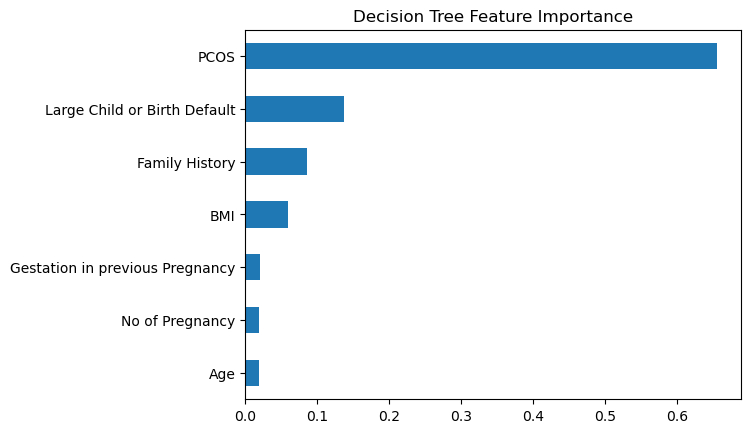

In [71]:
sorted_idx = dtree.feature_importances_.argsort()
pd.Series(dtree.feature_importances_[sorted_idx],index=X.columns).plot(kind='barh')
plt.title("Decision Tree Feature Importance")

In [43]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [54]:
# To find the performance of the model calculated accuracy.
cm=confusion_matrix(y_test, svc_pred)
cm=(cm/1762*100)
cm.round()
print(cm)
print(classification_report(y_test, svc_pred))


[[59.30760499  1.75936436]
 [ 5.61861521 33.31441544]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1076
           1       0.95      0.86      0.90       686

    accuracy                           0.93      1762
   macro avg       0.93      0.91      0.92      1762
weighted avg       0.93      0.93      0.93      1762



In [53]:
cm=confusion_matrix(y_test, rfc_predictions)
cm=(cm/1762*100)
cm.round()
print(cm)
print(classification_report(y_test, rfc_predictions))




[[58.7400681   2.32690125]
 [ 2.44040863 36.49262202]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1076
           1       0.94      0.94      0.94       686

    accuracy                           0.95      1762
   macro avg       0.95      0.95      0.95      1762
weighted avg       0.95      0.95      0.95      1762



In [144]:
cm=confusion_matrix(y_test, AdaB_predictions)
cm=(cm/1762*100)
cm.round()
print(cm)
print(classification_report(y_test, AdaB_predictions))


[[58.56980704  2.49716232]
 [ 2.83768445 36.0953462 ]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1076
           1       0.94      0.93      0.93       686

    accuracy                           0.95      1762
   macro avg       0.94      0.94      0.94      1762
weighted avg       0.95      0.95      0.95      1762



In [52]:
cm=confusion_matrix(y_test, LR_predictions)
cm=(cm/1762*100)

print(cm)
print(classification_report(y_test, LR_predictions))

[[59.19409762  1.87287174]
 [ 5.78887628 33.14415437]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1076
           1       0.95      0.85      0.90       686

    accuracy                           0.92      1762
   macro avg       0.93      0.91      0.92      1762
weighted avg       0.92      0.92      0.92      1762



In [142]:
cm=confusion_matrix(y_test, dtree_predictions)
cm=(cm/1762*100)
cm.round()
print(cm)
print(classification_report(y_test, dtree_predictions))

[[59.47786606  1.58910329]
 [ 1.5323496  37.40068104]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1076
           1       0.96      0.96      0.96       686

    accuracy                           0.97      1762
   macro avg       0.97      0.97      0.97      1762
weighted avg       0.97      0.97      0.97      1762



In [141]:
cm=confusion_matrix(y_test, Naivebayes_pred)
cm=(cm/1762*100)
cm.round()
print(cm)
print(classification_report(y_test, Naivebayes_pred))

[[59.02383655  2.0431328 ]
 [ 6.1861521  32.74687855]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.93      1076
           1       0.94      0.84      0.89       686

    accuracy                           0.92      1762
   macro avg       0.92      0.90      0.91      1762
weighted avg       0.92      0.92      0.92      1762



In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(svc_model, X_test, y_test)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("SupportVectorMachine")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

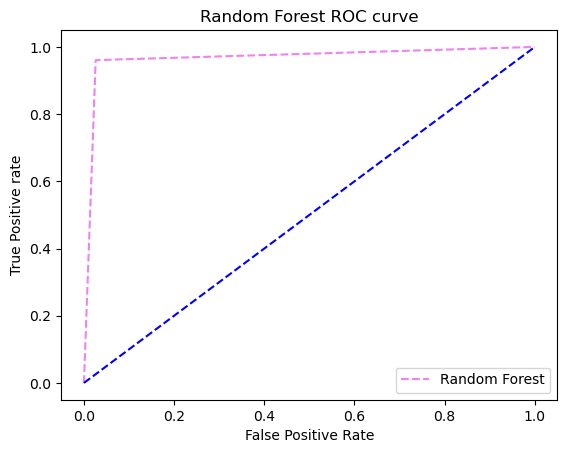

0.967309547292098


In [70]:
pred_prob2 = rfc.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score5 = roc_auc_score(y_test, pred_prob1[:,1])
# plot roc curves
plt.plot(fpr5, tpr5, linestyle='--',color='violet', label='Random Forest')
plt.title('Random Forest ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

print(auc_score5)

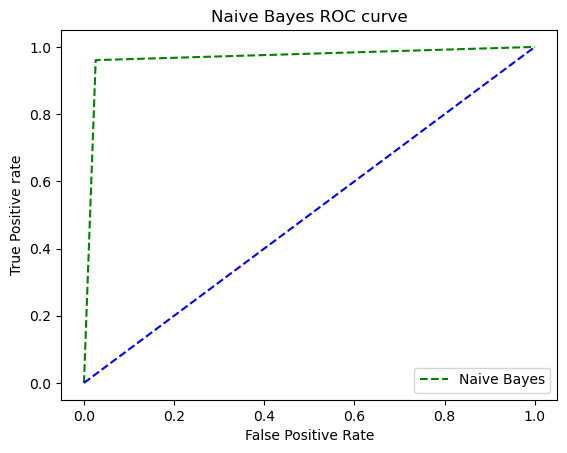

0.967309547292098


In [68]:
pred_prob4 = Naivebayes.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score4 = roc_auc_score(y_test, pred_prob1[:,1])
# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',color='Green', label='Naive Bayes')
plt.title('Naive Bayes ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

print(auc_score4)

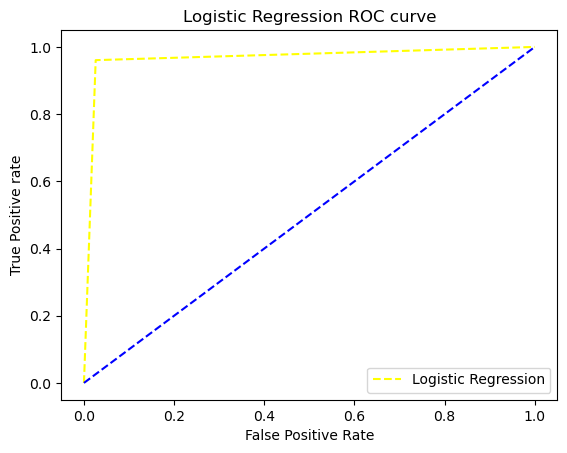

0.967309547292098


In [67]:
pred_prob = LR.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score3 = roc_auc_score(y_test, pred_prob1[:,1])
# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='Yellow', label='Logistic Regression')
plt.title('Logistic Regression ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

print(auc_score3)

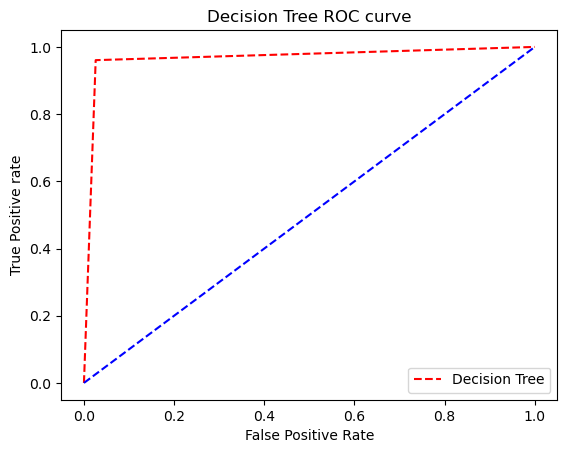

0.967309547292098


In [65]:
pred_prob2 = dtree.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score2 = roc_auc_score(y_test, pred_prob1[:,1])
# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='Red', label='Decision Tree')
plt.title('Decision Tree ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

print(auc_score2)

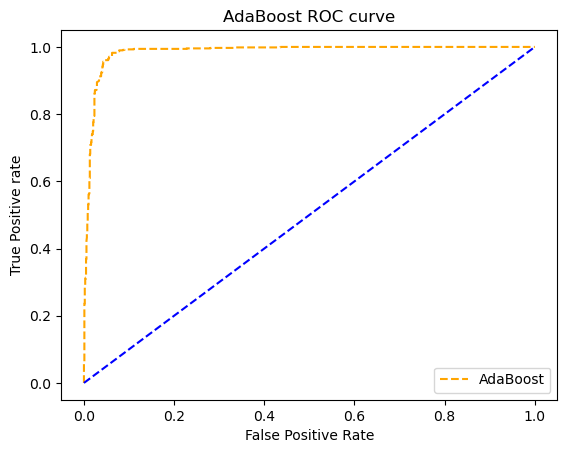

0.9852662652952843


In [63]:
# predict probabilities
pred_prob1 = AdaB.predict_proba(X_test)

from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='AdaBoost')
plt.title('AdaBoost ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

print(auc_score1)

In [48]:
# predict probabilities
pred_prob1 = AdaB.predict_proba(X_test)
pred_prob2 = dtree.predict_proba(X_test)
pred_prob3 = LR.predict_proba(X_test)
pred_prob4 = rfc.predict_proba(X_test)
pred_prob5 = Naivebayes.predict_proba(X_test)

from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])

print(auc_score1,auc_score2, auc_score3, auc_score4, auc_score5)

0.9852662652952843 0.9684394203778165 0.9417072192658263 0.9906778696608756 0.9412791138760337


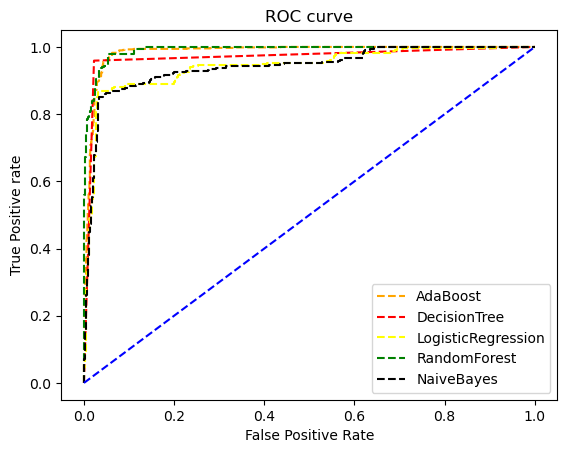

In [50]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='AdaBoost')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='DecisionTree')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='LogisticRegression')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='RandomForest')
plt.plot(fpr5, tpr5, linestyle='--',color='black', label='NaiveBayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

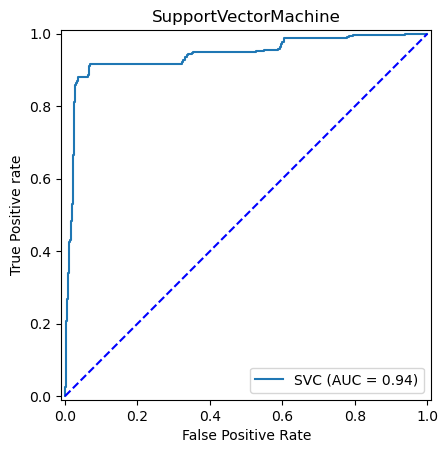

In [55]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(svc_model, X_test, y_test)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("SupportVectorMachine")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (7).

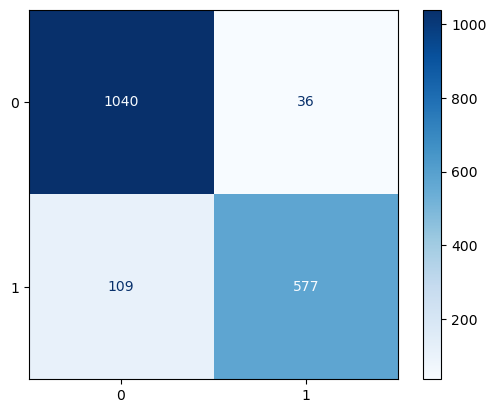

In [78]:
cm=confusion_matrix(y_test, Naivebayes_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= "Outcome")
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (7).

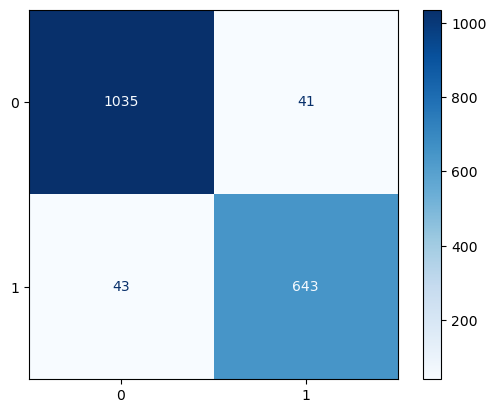

In [51]:
cm=confusion_matrix(y_test, rfc_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= "Outcome")
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (7).

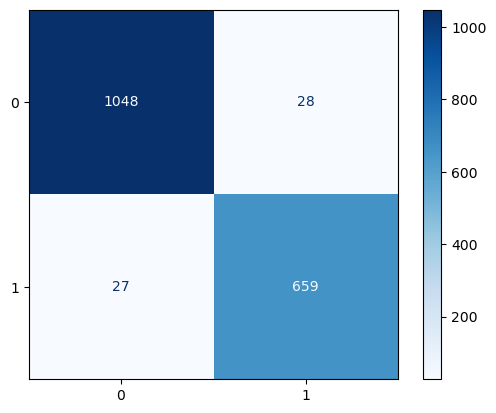

In [55]:
cm=confusion_matrix(y_test, dtree_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= "Outcome")
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (7).

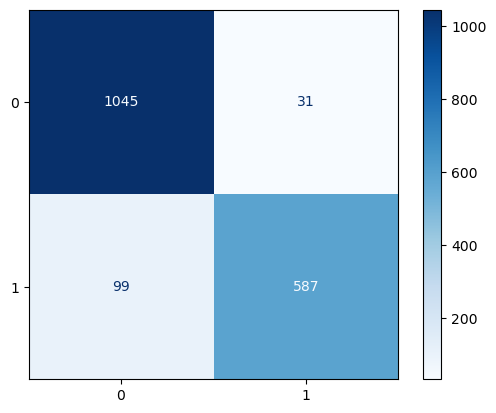

In [56]:
cm=confusion_matrix(y_test, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= "Outcome")
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (7).

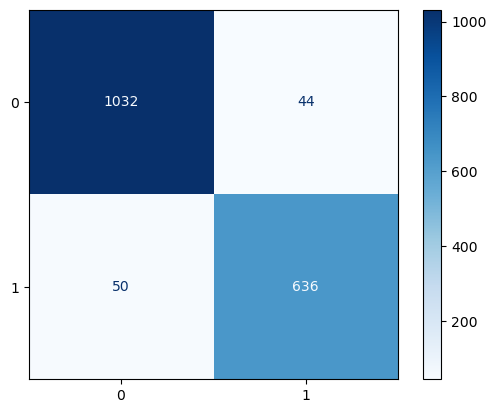

In [57]:
cm=confusion_matrix(y_test, AdaB_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= "Outcome")
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (7).

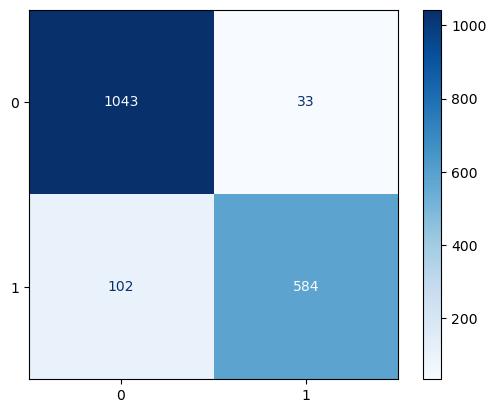

In [58]:
cm=confusion_matrix(y_test, LR_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= "Outcome")
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()